In [1]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
%matplotlib inline

df = pd.read_csv('train.csv')

In [2]:
#Procurando correlação com o nosso objetivo: prever a sobrevivência dos passageiros
df1 = df.corr()
df1['Survived']
#Vemos que o preço pago pelo ticket possui relação com a sobrevivência:
#As passagens mais caras ficavam nos andares superiores do navio

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [3]:
#Procurando valores nulos para verificar a qualidade dos dados 
df.isna().sum()
#Ótimo porque as variaveis com valores nulos não interessam no algoritmo

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#Uso de mapping para contabilizar os lugares de embarque
# 0 - Cherbourg, 1 - Queenstown, 2 - Southampton

# Definindo as classes
embark_map = {'C' : 0, 'Q' : 1, 'S' : 2} ##Definindo o mapeamento 

# Aplicando o mapeamento ao dataset
df2 = df['Embarked'].map(embark_map)

In [5]:
df2.value_counts()

2.0    644
0.0    168
1.0     77
Name: Embarked, dtype: int64

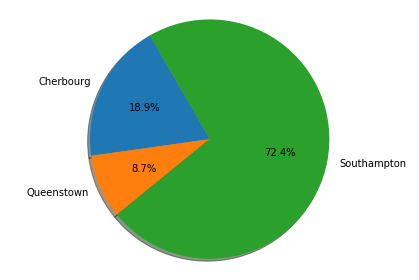

In [6]:
# Pie Chart mostrando a relação de lugar de embarque
labels = ['Cherbourg', 'Queenstown', 'Southampton']
sizes = [168, 77, 644]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=120)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [7]:
#Analisando a relação entre preço de passagem x Lugar de Embarque
df[['Fare','Embarked']]

,Fare,Embarked
0,7.2500,S
1,71.2833,C
2,7.9250,S
3,53.1000,S
4,8.0500,S
5,8.4583,Q
6,51.8625,S
7,21.0750,S
8,11.1333,S
9,30.0708,C


In [8]:
#Selecionando apenas as variaveis que temos interesse e tirando sua média

df3 = df[['Fare','Embarked']]
df3.groupby(['Embarked']).mean()

,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.079812


In [9]:
#Começando a fazer o Machine Learning -> Escolheremos as variaveis apenas com correlação significativa
df.corr()
#Ou seja -> Pclass e Fare

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
from sklearn.model_selection import train_test_split #Para separar o dataset em train e test 70/30 
# Definindo a taxa de split
split_test_size = 0.30

#X -> variaveis preditoras 
#Y -> variavel target 

X = df[['Pclass','Fare']]
Y = df['Survived']
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)


In [12]:
#Verificando se os dados divididos possuem a mesma razão

print("Sobrevive original : {0} ({1:0.2f}%)".format(len(df.loc[df['Survived'] == 1]), 
                                               (len(df.loc[df['Survived'] ==1])/len(df.index) * 100)))  #DADOS ORIGINAIS

print("Morte original : {0} ({1:0.2f}%)".format(len(df.loc[df['Survived'] == 0]), 
                                               (len(df.loc[df['Survived'] == 0])/len(df.index) * 100)))
print("")
print("Sobrevive treino : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100))) #DADOS DE TREINO 

print("Morte treino : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Sobrevive teste : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100))) #DADOS DE TESTE 

print("Morte teste: {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Sobrevive original : 342 (38.38%)
Morte original : 549 (61.62%)

Sobrevive treino : 231 (37.08%)
Morte treino : 392 (62.92%)

Sobrevive teste : 111 (41.42%)
Morte teste: 157 (58.58%)


In [13]:
#O modelo de Regressão Logística foi escolhido por ser um algoritmo simples e o problema ser de classificação (sobreviver,ou não)
from sklearn import metrics #Importando as metricas de exatidao
from sklearn.linear_model import LogisticRegression
#Treinando o modelo
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_treino, Y_treino)
#Testando o modelo
clf.predict(X_teste)
#Vendo o Score do modelo
clf.score(X_teste, Y_teste)

0.6940298507462687

In [14]:
#Metrificando o modelo utilizando Confusion Matrix -> Ler mais sobre
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_teste, clf.predict(X_teste))
#Vemos que temos um modelo com uma boa precisão de 70%

array([[133,  24],
       [ 58,  53]], dtype=int64)

In [15]:
#Abrindo o arquivo para fazer o submission e verificando qual posição há valores NaN
am = pd.read_csv('test.csv')
am[am['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [16]:
#Preenchendo essa posição com a média da variável -> observar caraceristicas antes para balizar a média
#Rodando os dados no algoritmo
am['Fare'] = am['Fare'].fillna(am['Fare'].median())
X2 = am[['Pclass','Fare']]
result2 = clf.predict(X2)

In [17]:
#Criando o arquivo csv para submit, definindo os tipos de dados
output = pd.DataFrame({"PassengerId": am['PassengerId'], "Survived": result2})
output.PassengerId = output.PassengerId.astype(int)
output.Survived = output.Survived.astype(int)

output.to_csv("output.csv", index=False)
print("Your submission was successfully saved!")
output.tail()

Your submission was successfully saved!


,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
